**Import Libraries** 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

**Load Datasets**

In [48]:
# Load data
data = pd.read_csv(r"D:\Data science\Heart Failure Prediction\heart_failure_clinical_records_dataset.csv")

# Display dataset info
data.info()

# Display first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Data spliting**

In [49]:
# Prepare features and target
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

**Train the Model**

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Model**

In [51]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Make predictions
y_pred = lr_model.predict(X_test)

# Since Linear Regression outputs continuous values, we'll need to convert predictions to binary class labels
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

**Model Evaluation**

In [53]:
# Evaluate the model using classification metrics
cm = confusion_matrix(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Display the accuracy
print(f'Accuracy value: {accuracy * 100:.2f}%')

Accuracy value: 80.00%


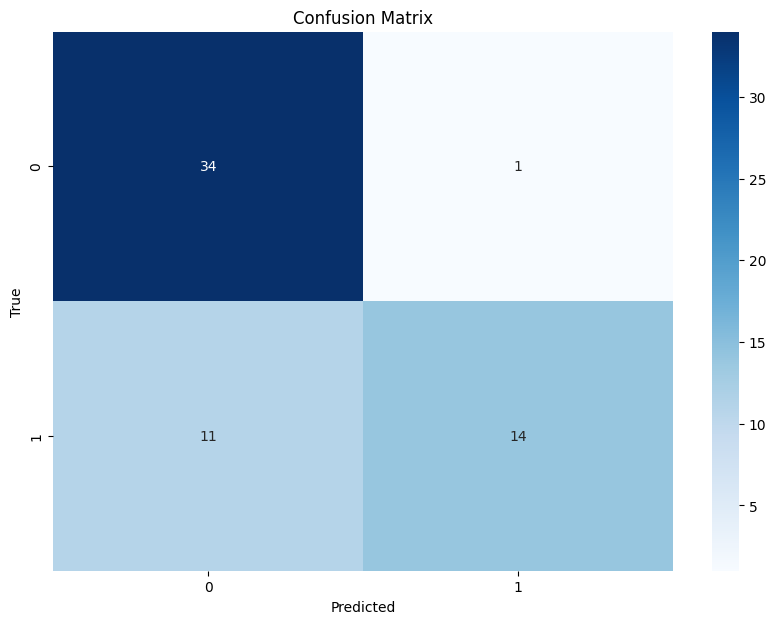

In [54]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and titles
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [57]:
# Save the trained Linear Regression model to a file
joblib_file = "Heart Failure Prediction model.pkl"
joblib.dump(lr_model, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to Heart Failure Prediction model.pkl


In [58]:
# Load the trained Linear Regression model from the file
loaded_lr_model = joblib.load(joblib_file)

print("Heart Failure Prediction model", joblib_file)

Heart Failure Prediction model Heart Failure Prediction model.pkl
